# Misc. LoFreq-related plots

In [2]:
%run "Header.ipynb"

In [3]:
import pileup
seq2pos2pileup = pileup.load()

## Intro: just load LoFreq data

It might be nice to abstract this, since this code is now used (1) here, (2) in the CP 1/2/3 notebook, and (3) in the target/decoy notebook.

In [4]:
from pysam import VariantFile
lofreq_calls = VariantFile("../seqs/lofreq.vcf")
seq2lofreq_calls = {s: set() for s in SEQS}
for c in lofreq_calls.fetch():
    seq2lofreq_calls[c.contig].add(c.pos)

## Plot distributions of LoFreq's calls' mutation frequencies

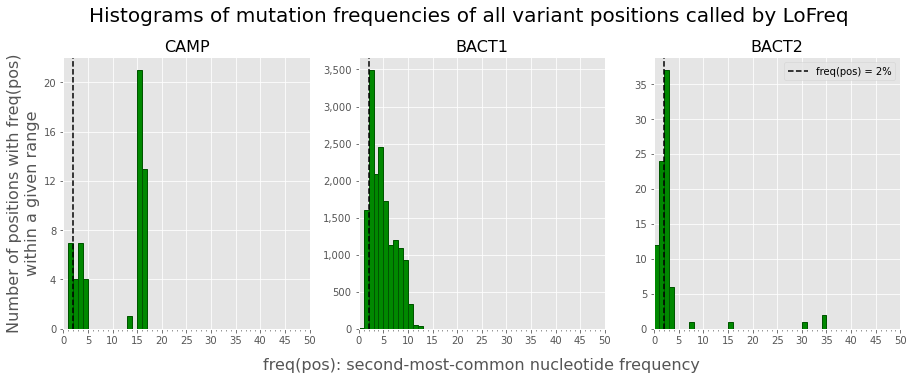

In [11]:
from matplotlib.ticker import MultipleLocator

fig, axes = pyplot.subplots(1, 3)
for si, seq in enumerate(SEQS):
    lf_muts = seq2lofreq_calls[seq]

    alt_nt_pcts = []
    for pos in lf_muts:
        alt_nt_pcts.append(100 * pileup.get_alt_nt_pct(seq2pos2pileup[seq][pos]))
        
    bins = range(0, 51)
    axes[si].hist(alt_nt_pcts, color="#008800", linewidth=1, edgecolor="#005500", bins=bins)
    
    axes[si].set_title(seq2name[seq], fontsize=16)
    
    use_thousands_sep(axes[si].yaxis)
    if seq == "edge_6104":
        # hack to get matplotlib to not use multiples of 2.5 for this plot lol
        axes[si].yaxis.set_major_locator(MultipleLocator(4))
    
    # Code based on the diversity index histograms
    axes[si].set_xlim(0, 50)
    axes[si].set_xticks(bins, minor=True)
    # Numbers every 5%: https://matplotlib.org/stable/gallery/ticks_and_spines/major_minor_demo.htmls
    axes[si].xaxis.set_major_locator(MultipleLocator(5))
    
    axes[si].axvline(2, linestyle="--", color="#000000", label="freq(pos) = 2%")

axes[0].set_ylabel("Number of positions with freq(pos)\nwithin a given range", fontsize=16)
axes[1].set_xlabel("freq(pos): second-most-common nucleotide frequency", fontsize=16, labelpad=12)
axes[2].legend()

fig.suptitle("Histograms of mutation frequencies of all variant positions called by LoFreq", fontsize=20,y=1.02)
fig.set_size_inches(15, 5)

fig.savefig("figs/lofreq-mutfreq-hists.png", bbox_inches="tight")